In [126]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

from astropy.table import Table

from S4Mock_io import read_clustering_dat,read_clustering_ran,read_mainsurvey_targets,read_desitargetrandoms
from corr_func_tools import calc_wtheta,create_axes

import numpy as np
import matplotlib.pyplot as plt

nbins = 30

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
dat = read_clustering_dat()
ran = read_clustering_ran()

In [133]:
targ = read_mainsurvey_targets()

Runtime of 0.115084 seconds after 0 pixels
Runtime of 4.180162 seconds after 20 pixels
Runtime of 7.333364 seconds after 40 pixels
Runtime of 10.842681 seconds after 60 pixels
Runtime of 13.687255 seconds after 80 pixels
Runtime of 17.163208 seconds after 100 pixels
Runtime of 21.658799 seconds after 120 pixels
Runtime of 23.739286 seconds after 140 pixels
Runtime of 26.270647 seconds after 160 pixels
Runtime of 29.601959 seconds after 180 pixels
Runtime of 32.884691 seconds after 200 pixels
Runtime of 35.369826 seconds after 220 pixels
Runtime of 36.829625 seconds after 240 pixels
Runtime of 39.492798 seconds after 260 pixels
Runtime of 42.102046 seconds after 280 pixels
Runtime of 46.767282 seconds after 300 pixels
Runtime of 50.411537 seconds after 320 pixels
Runtime of 53.558130 seconds after 340 pixels
Runtime of 56.025969 seconds after 360 pixels
Runtime of 57.915314 seconds after 380 pixels
Runtime of 60.142725 seconds after 400 pixels
Runtime of 63.490145 seconds after 420 pixe

In [136]:
#just to make calc_wtheta run quicker

targ = targ[(targ['PHOTSYS']=='S')]
targ_small = targ[((targ['RA']>180) & (targ['RA']<190) & (targ['DEC']>0) & (targ['DEC']<10))]

In [137]:
targ_ran = read_desitargetrandoms()

In [138]:
targ_ran_small = targ_ran[((targ_ran['RA']>180) & (targ_ran['RA']<190) & (targ_ran['DEC']>0) & (targ_ran['DEC']<10))]

In [110]:
wtheta = calc_wtheta(dat,ran,nbins=nbins)

In [111]:
weighted_wtheta = calc_wtheta(dat,ran,weight=True,nbins=nbins)

In [139]:
targ_wtheta =  calc_wtheta(targ_small,targ_ran_small,nbins=nbins)

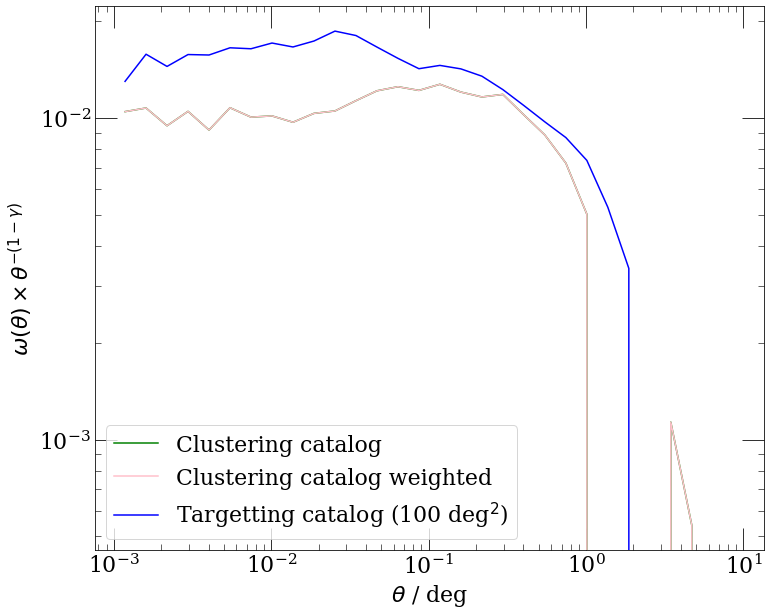

In [149]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

x_axis,y_axis = create_axes(wtheta,nbins)
x_axis_w,y_axis_w = create_axes(weighted_wtheta,nbins)
x_axis_t,y_axis_t = create_axes(targ_wtheta,nbins)
    
plt.figure(figsize=(12,10))
plt.plot(x_axis, y_axis,color='green',label='Clustering catalog')
plt.plot(x_axis, y_axis_w,color='pink',label='Clustering catalog weighted')
plt.plot(x_axis, y_axis_t,color='blue',label=r'Targetting catalog (100 deg$^2$)')

plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

#plt.savefig('clustering_corrfunc.png',bbox_inches='tight')

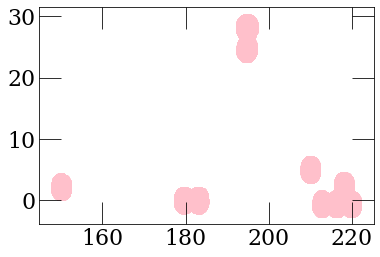

In [151]:
plt.scatter(ran['RA'],ran['DEC'],color='pink')

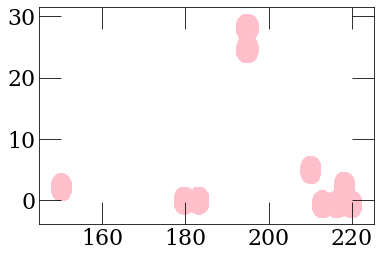

In [152]:
plt.scatter(dat['RA'],dat['DEC'],color='pink')

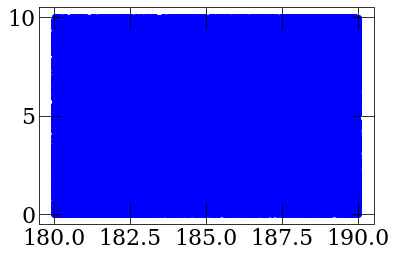

In [153]:
plt.scatter(targ_small['RA'],targ_small['DEC'],color='blue')

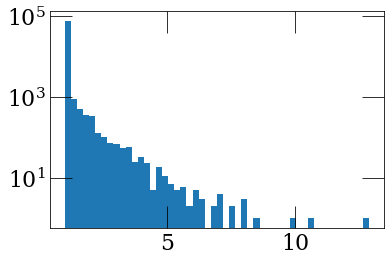

In [115]:
plt.hist(dat['WEIGHT'],bins=50)
plt.yscale('log')

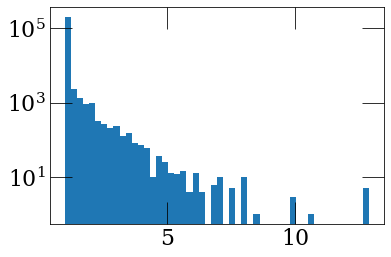

In [116]:
plt.hist(ran['WEIGHT'],bins=50)
plt.yscale('log')